In [1]:
# import libraries

import seaborn as sns
import pandas as pd
import numpy as np
#from datasets import list_datasets, load_dataset # hugging face dataset
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from sklearn.utils import resample
from sklearn.metrics import f1_score
import random
import torch
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

import os
import glob
import sys
sys.path.append(os.path.dirname((os.path.abspath(''))))

In [ ]:
try:    
    from google.colab import drive
    drive.mount('/content/drive/', force_remount= True)
except ImportError as e:
    print("error")
    pass

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/MyDrive/uni-mannheim/web-mining/project_v_2'

/content/drive/MyDrive/uni-mannheim/web-mining/project_v_2


In [ ]:
currentdir =  '/content/drive/MyDrive/uni-mannheim/web-mining/project_v_2'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
!pip install datasets

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple


In [4]:
#!pip install pytorch torchvision torchaudio cudatoolkit=11.0 -c pytorch
# Install hugging face library 
#only colab
!pip install transformers

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple


In [5]:
# check the installed version
!pip show transformers

Name: transformers
Version: 4.19.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache
Location: c:\users\d073999\miniconda3\envs\torch\lib\site-packages
Requires: numpy, regex, tokenizers, importlib-metadata, pyyaml, huggingface-hub, tqdm, requests, filelock, packaging
Required-by: 


In [6]:
!pip install emoji
import emoji

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple


# Upload preprocessed data

In [8]:
df = pd.read_csv('C:\\Users\\D073999\\Documents\\uni-Mannheim\\web mining\\Amazon_reviews\\data\\shortend10000_dataset_preprocessed.csv')
df = df.sort_values(by='reviewText', ascending=False).reset_index(drop=True)

In [9]:
# removing usernames from tweet
#df['reviewText'] = df.reviewText.str.replace('@user', '', regex=True) 
# rmoveing punktuation
#df["reviewText"] = df["reviewText"].str.replace("[^a-zA-Z#]", " ")
# removing hashes
#df["reviewText"] = df["reviewText"].str.replace("#", " ")

In [10]:
all_texts = list(df.reviewText)
all_labels = list(df.label)

In [11]:
import re
def transform_text(text):
    
    text = re.sub('[^a-zA-Z]', ' ', str(text))

         # remove everything that is not a word 
    text =  re.sub("[^a-z]+", " ",text)
    
   

    # remove Links 
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)

    # remove emojis
    text = emoji.demojize(text.lower(), language='en')
    
    return text

all_texts_preprocessed = []
for i in range(len(all_texts)):
    all_texts_preprocessed.append(transform_text(all_texts[i]))



print(all_texts_preprocessed[:2])

[' ery boring disapointing game errible gameplay graphics bla bla bla he cinematics run extremely slow frame rate t least music kinda good recommend god damn gamer ', 'yukyguo y fktfk tk k tduj tdk tdj tr kjtdkdcuj xtrjjr tk r dkjrd kjrskj rkjtdyk td kytk ykt']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(all_texts, all_labels, test_size=0.2, random_state=RANDOM_SEED, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=RANDOM_SEED, shuffle=True)
print(f' length of train is: {len(X_train)}, length of validation data is: {len(X_val)}, length of test data is: {len(X_test)}')

 length of train is: 7999, length of validation data is: 1000, length of test data is: 1000


C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


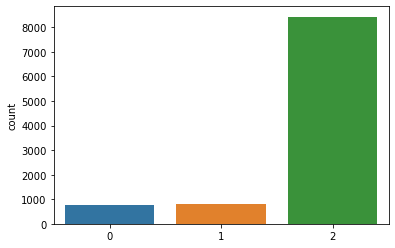

In [13]:
ax=sns.countplot(all_labels);

Balance positive class for train data by oversampling

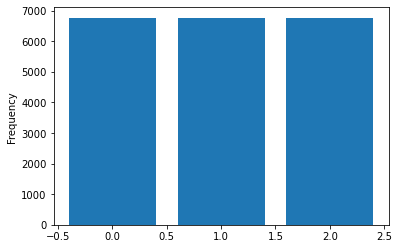

,reviewText,label
0,"Believe me, I would give game zero stars Amazo...",0
1,What say FF7. Its incredibly difficult beat ga...,2
2,Well I bought mainly cause I always liked soun...,0
3,If liked Dungeoun Siege Divine Divinity type g...,2
4,I given game friend want anymore. Now I see qu...,0


In [14]:
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()
X_train, y_train = sampler.fit_resample(np.array(X_train).reshape(-1,1), list(y_train))
data = X_train
label = y_train
class_dist = pd.Series(label).value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()
data.flatten()
data = pd.DataFrame(data, columns = ['reviewText'])
data['label'] = label
data.head()

In [15]:
X_train.shape

(20295, 1)

In [16]:
from transformers import BertTokenizer
# Specify the pre-trained model name.
PRE_TRAINED_MODEL_NAME = 'bert-base-cased' # uncased

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME, do_lower_case=True)

Loading BERT tokenizer...


In [17]:
# So to put all the things together,
# we can write a class: with the input texts, labels, tokenizer and max_len
# we'll have the review_text, input_ids, attention_mask, labels as our output
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
class ReviewDataset(Dataset):

  def __init__(self, reviews, labels, tokenizer, max_len):
    self.reviews = reviews
    self.labels = labels
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)

  def __getitem__(self, item):
    review = str(self.reviews[item])
    label = self.labels[item]
    # `encode_plus` will:
      #   (1) Tokenize the text.
      #   (2) Prepend the `[CLS]` token to the start.
      #   (3) Append the `[SEP]` token to the end.
      #   (4) Map tokens to their IDs.
      #   (5) Pad or truncate the sentence to `max_length` with [PAD] tokens
      #   (6) Create attention masks for [PAD] tokens
    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True, # Add '[CLS]' and '[SEP]' and [PAD]
      max_length=self.max_len, # Pad & truncate all texts
      pad_to_max_length=True,
      return_token_type_ids=False,
      return_attention_mask=True, # Construct attention masks
      return_tensors='pt', # Return pytorch tensors
    )
    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'labels': torch.tensor(label, dtype=torch.long)
    }

In [30]:
# Then we use DataLoader class from pytorch https://pytorch.org/docs/stable/data.html
# which help us to customizing data loading order and do automatic batching
def create_data_loader(X, Y, tokenizer, max_len, batch_size, num_workers=0, sampler = None):
  ds = ReviewDataset(
    reviews=np.array(X),
    labels=np.array(Y),
    tokenizer=tokenizer,
    max_len=max_len
  )
  if sampler!=None:
    sampler = sampler(ds)

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=num_workers,
    sampler = sampler
  )

In [31]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
MAX_LEN = 128
BATCH_SIZE = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_data_loader = create_data_loader(X_train, y_train, tokenizer, MAX_LEN, BATCH_SIZE, sampler = RandomSampler) # Select batches randomly

# For validation & testing samples, the order doesn't matter, so we'll just read them sequentially.
val_data_loader = create_data_loader(X_val, y_val, tokenizer, MAX_LEN, BATCH_SIZE, sampler = SequentialSampler) # Pull out batches sequentially.

test_data_loader = create_data_loader(X_test, y_test, tokenizer, MAX_LEN, BATCH_SIZE, sampler = SequentialSampler) # Pull out batches sequentially.

In [32]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    PRE_TRAINED_MODEL_NAME, # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels, in our case it's multi-class tasks with classes=3  
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [33]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (28996, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [34]:
# More optimizers to look up: https://pytorch.org/docs/stable/optim.html
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 1e-3
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-6.
                )

In [35]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4 (depend on the usage, you can also set it larger)
# We chose to run for 3
EPOCHS = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_data_loader) * EPOCHS

# Create the learning rate scheduler, here we use a linear scheduler with no warmup steps
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

# Define our loss function
loss_fn = nn.CrossEntropyLoss().to(device)

In [36]:
# Training
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
  model.train()
  total_train_accuracy = 0
  total_train_loss = 0
  losses = []
  correct_predictions = 0
  for step, batch in enumerate(data_loader):
    if step % 40 == 0 and not step == 0:
       print('Batch: {}  of  {}'.format(step, len(data_loader)))
    input_ids = batch["input_ids"].to(device)
    attention_mask = batch["attention_mask"].to(device)
    labels = batch["labels"].to(device)
    model.zero_grad()
    outputs = model(
      input_ids=input_ids,
      token_type_ids=None,
      attention_mask=attention_mask,
      labels=labels
    )
    loss = outputs[0]
    total_train_loss += loss.item()
    loss.backward()
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)# avoid exploding gradients
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

    logits = outputs[1].detach().cpu().numpy()
    label_ids = labels.to('cpu').numpy()
    total_train_accuracy += flat_accuracy(logits, label_ids)
  # Calculate the average loss over all of the batches.
  avg_train_accuracy = total_train_accuracy / len(data_loader)
  avg_train_loss = total_train_loss / len(data_loader) 
  return avg_train_accuracy, avg_train_loss

In [37]:

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    #print("acc shape", preds.shape)
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def f1Score(preds, labels):
    #print("f1 score", np.array(preds).shape)
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    #return f1_score(pred_flat, labels_flat, average='micro')
    return pred_flat, labels_flat

def flatten_arrays(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return pred_flat, labels_flat

In [38]:
# Evaluation

def eval_model(model, data_loader, loss_fn, device, n_examples):
  model.eval()
  total_eval_accuracy = 0
  total_f1_score = 0
  total_eval_loss = 0
  nb_eval_steps = 0
  losses = []
  correct_predictions = 0
  train_metrics_f1 = []
  f1_label_ids = []
  f1_logits = []
  with torch.no_grad():
    for batch in data_loader:
      train_f1 = 0.0 # f1
      batch_cnt = 0
      input_ids = batch["input_ids"].to(device)
      attention_mask = batch["attention_mask"].to(device)
      labels = batch["labels"].to(device)
      outputs = model(
        input_ids=input_ids,
        token_type_ids=None,
        attention_mask=attention_mask,
        labels=labels
      )
      total_eval_loss += outputs[0].item()
      logits = outputs[1].detach().cpu().numpy()
      label_ids = labels.to('cpu').numpy()
      total_eval_accuracy += flat_accuracy(logits, label_ids)
      logits_flat,label_ids_flat = f1Score(logits, label_ids)
      f1_label_ids.extend(label_ids_flat)
      f1_logits.extend(logits_flat)
      batch_cnt += 1

  print("f1-score: ", f1_score(f1_logits, f1_label_ids, average='macro'))
  print(classification_report(f1_label_ids, f1_logits, digits=3))

  avg_val_accuracy = total_eval_accuracy / len(data_loader)
  avg_val_loss = total_eval_loss / len(data_loader)
  #print("f1-score: ", train_f1/len(data_loader))
  #print("Accuracy: {0:.2f}".format(avg_val_accuracy))
  #print("Validation Loss: {0:.2f}".format(avg_val_loss))
  return avg_val_accuracy, avg_val_loss

In [27]:
!pip install ray

Looking in indexes: https://int.repositories.cloud.sap/artifactory/api/pypi/build-releases-pypi/simple, https://int.repositories.cloud.sap/artifactory/api/pypi/build-milestones-pypi/simple


In [ ]:
from functools import partial
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
import torchvision
import torchvision.transforms as transforms
from ray import tune
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler
import os

In [39]:
#checkpoint_dir = currentdir + "/checkpoints"
#data_dir = currentdir + "/Data_mining/data/"

In [40]:
%%time
from collections import defaultdict
history = defaultdict(list)
best_accuracy = 0


for epoch in range(EPOCHS):
  print('Epoch: {}/{}'.format(epoch+1, EPOCHS))
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(X_train)
  )
  print('Train loss: {}, Accuracy: {}'.format(train_loss, train_acc))
  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(X_val)
  )
  print('Val loss: {}, Accuracy: {}'.format(val_loss, val_acc))
  print()
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc


# last output Val loss: 0.1250698012439534, Accuracy: 0.971205357142857

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Epoch: 1/3
----------


C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Batch: 40  of  635
Batch: 80  of  635
Batch: 120  of  635
Batch: 160  of  635
Batch: 200  of  635
Batch: 240  of  635
Batch: 280  of  635
Batch: 320  of  635
Batch: 360  of  635
Batch: 400  of  635
Batch: 440  of  635
Batch: 480  of  635
Batch: 520  of  635
Batch: 560  of  635
Batch: 600  of  635
Train loss: 0.5167052666737338, Accuracy: 0.7859744094488189
f1-score:  0.5430303030303031
              precision    recall  f1-score   support

           0      0.405     0.486     0.442        70
           1      0.237     0.359     0.286        78
           2      0.932     0.873     0.902       852

    accuracy                          0.806      1000
   macro avg      0.525     0.573     0.543      1000
weighted avg      0.841     0.806     0.822      1000

Val loss: 0.578533015679568, Accuracy: 0.8046875

Epoch: 2/3
----------


C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Batch: 40  of  635
Batch: 80  of  635
Batch: 120  of  635
Batch: 160  of  635
Batch: 200  of  635
Batch: 240  of  635
Batch: 280  of  635
Batch: 320  of  635
Batch: 360  of  635
Batch: 400  of  635
Batch: 440  of  635
Batch: 480  of  635
Batch: 520  of  635
Batch: 560  of  635
Batch: 600  of  635
Train loss: 0.11138296930750055, Accuracy: 0.9639974690663667
f1-score:  0.5347036535877486
              precision    recall  f1-score   support

           0      0.605     0.371     0.460        70
           1      0.235     0.205     0.219        78
           2      0.906     0.945     0.925       852

    accuracy                          0.847      1000
   macro avg      0.582     0.507     0.535      1000
weighted avg      0.832     0.847     0.837      1000

Val loss: 0.7474929527379572, Accuracy: 0.84765625

Epoch: 3/3
----------


C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Batch: 40  of  635
Batch: 80  of  635
Batch: 120  of  635
Batch: 160  of  635
Batch: 200  of  635
Batch: 240  of  635
Batch: 280  of  635
Batch: 320  of  635
Batch: 360  of  635
Batch: 400  of  635
Batch: 440  of  635
Batch: 480  of  635
Batch: 520  of  635
Batch: 560  of  635
Batch: 600  of  635
Train loss: 0.04186891580117852, Accuracy: 0.9878444881889764
f1-score:  0.5482566046948932
              precision    recall  f1-score   support

           0      0.628     0.386     0.478        70
           1      0.241     0.244     0.242        78
           2      0.911     0.939     0.925       852

    accuracy                          0.846      1000
   macro avg      0.593     0.523     0.548      1000
weighted avg      0.839     0.846     0.840      1000

Val loss: 0.8569148173555732, Accuracy: 0.8466796875

Wall time: 19min 36s


In [41]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test)
)
print('Testing Accuracy: {}'.format(test_acc.item()))

C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


f1-score:  0.6027407352316123
              precision    recall  f1-score   support

           0      0.696     0.438     0.538        89
           1      0.392     0.312     0.347        93
           2      0.895     0.952     0.923       818

    accuracy                          0.847      1000
   macro avg      0.661     0.567     0.603      1000
weighted avg      0.831     0.847     0.835      1000

Testing Accuracy: 0.84765625


# **Using uncased BERT**


In [42]:

# Specify the pre-trained model name.
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME, do_lower_case=True)

from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    PRE_TRAINED_MODEL_NAME, # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels, in our case it's multi-class tasks with classes=3  
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Loading BERT tokenizer...


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [43]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
MAX_LEN = 128
BATCH_SIZE = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_data_loader = create_data_loader(X_train, y_train, tokenizer, MAX_LEN, BATCH_SIZE, sampler = RandomSampler) # Select batches randomly

# For validation & testing samples, the order doesn't matter, so we'll just read them sequentially.
val_data_loader = create_data_loader(X_val, y_val, tokenizer, MAX_LEN, BATCH_SIZE, sampler = SequentialSampler) # Pull out batches sequentially.

test_data_loader = create_data_loader(X_test, y_test, tokenizer, MAX_LEN, BATCH_SIZE, sampler = SequentialSampler) # Pull out batches sequentially.

In [44]:
# More optimizers to look up: https://pytorch.org/docs/stable/optim.html
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 1e-3
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-6.
                )

C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [45]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4 (depend on the usage, you can also set it larger)
# We chose to run for 3
EPOCHS = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_data_loader) * EPOCHS

# Create the learning rate scheduler, here we use a linear scheduler with no warmup steps
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

# Define our loss function
loss_fn = nn.CrossEntropyLoss().to(device)

In [46]:
%%time
from collections import defaultdict
history = defaultdict(list)
best_accuracy = 0

print("2. Using Bert uncased pretrained Model")
for epoch in range(EPOCHS):
  print('Epoch: {}/{}'.format(epoch+1, EPOCHS))
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(X_train)
  )
  print('Train loss: {}, Accuracy: {}'.format(train_loss, train_acc))
  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(X_val)
  )
  print('Val loss: {}, Accuracy: {}'.format(val_loss, val_acc))
  print()
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc


# last output Val loss: 0.1250698012439534, Accuracy: 0.971205357142857

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


2. Using Bert uncased pretrained Model
Epoch: 1/3
----------


C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Batch: 40  of  635
Batch: 80  of  635
Batch: 120  of  635
Batch: 160  of  635
Batch: 200  of  635
Batch: 240  of  635
Batch: 280  of  635
Batch: 320  of  635
Batch: 360  of  635
Batch: 400  of  635
Batch: 440  of  635
Batch: 480  of  635
Batch: 520  of  635
Batch: 560  of  635
Batch: 600  of  635
Train loss: 0.45831303317246475, Accuracy: 0.8155230596175479
f1-score:  0.5766940326126112
              precision    recall  f1-score   support

           0      0.513     0.557     0.534        70
           1      0.255     0.308     0.279        78
           2      0.929     0.905     0.917       852

    accuracy                          0.834      1000
   macro avg      0.566     0.590     0.577      1000
weighted avg      0.847     0.834     0.840      1000

Val loss: 0.5866230414249003, Accuracy: 0.83203125

Epoch: 2/3
----------


C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Batch: 40  of  635
Batch: 80  of  635
Batch: 120  of  635
Batch: 160  of  635
Batch: 200  of  635
Batch: 240  of  635
Batch: 280  of  635
Batch: 320  of  635
Batch: 360  of  635
Batch: 400  of  635
Batch: 440  of  635
Batch: 480  of  635
Batch: 520  of  635
Batch: 560  of  635
Batch: 600  of  635
Train loss: 0.09419486365431377, Accuracy: 0.9699311023622047
f1-score:  0.5666625044223845
              precision    recall  f1-score   support

           0      0.574     0.443     0.500        70
           1      0.241     0.346     0.284        78
           2      0.926     0.906     0.916       852

    accuracy                          0.830      1000
   macro avg      0.580     0.565     0.567      1000
weighted avg      0.848     0.830     0.837      1000

Val loss: 0.8191354852169752, Accuracy: 0.828125

Epoch: 3/3
----------


C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Batch: 40  of  635
Batch: 80  of  635
Batch: 120  of  635
Batch: 160  of  635
Batch: 200  of  635
Batch: 240  of  635
Batch: 280  of  635
Batch: 320  of  635
Batch: 360  of  635
Batch: 400  of  635
Batch: 440  of  635
Batch: 480  of  635
Batch: 520  of  635
Batch: 560  of  635
Batch: 600  of  635
Train loss: 0.03645106777988785, Accuracy: 0.9892224409448819
f1-score:  0.558077347645693
              precision    recall  f1-score   support

           0      0.507     0.500     0.504        70
           1      0.244     0.256     0.250        78
           2      0.922     0.919     0.921       852

    accuracy                          0.838      1000
   macro avg      0.558     0.558     0.558      1000
weighted avg      0.840     0.838     0.839      1000

Val loss: 0.8579102624207735, Accuracy: 0.8359375

Wall time: 19min 25s


In [47]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test)
)
print('Testing Accuracy: {}'.format(test_acc.item()))

C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


f1-score:  0.5798461914403209
              precision    recall  f1-score   support

           0      0.590     0.517     0.551        89
           1      0.291     0.269     0.279        93
           2      0.900     0.919     0.909       818

    accuracy                          0.823      1000
   macro avg      0.593     0.568     0.580      1000
weighted avg      0.815     0.823     0.819      1000

Testing Accuracy: 0.82421875


RoBerta

In [54]:
from transformers import DistilBertTokenizer, AutoTokenizer, AutoModelWithLMHead, RobertaForSequenceClassification, AdamW, get_linear_schedule_with_warmup

# Specify the pre-trained model name.
PRE_TRAINED_MODEL_NAME = 'distilroberta-base'


# Load the BERT tokenizer.
print('Loading roBERTa tokenizer...')
tokenizer = AutoTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = RobertaForSequenceClassification.from_pretrained(
    PRE_TRAINED_MODEL_NAME, # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 3, # The number of output labels, in our case it's multi-class tasks with classes=3  
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Loading roBERTa tokenizer...


Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilroberta-base and are newly initialized: ['classifier.out_proj.bias

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [55]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
MAX_LEN = 128
BATCH_SIZE = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order.
train_data_loader = create_data_loader(X_train, y_train, tokenizer, MAX_LEN, BATCH_SIZE, sampler = RandomSampler) # Select batches randomly

# For validation & testing samples, the order doesn't matter, so we'll just read them sequentially.
val_data_loader = create_data_loader(X_val, y_val, tokenizer, MAX_LEN, BATCH_SIZE, sampler = SequentialSampler) # Pull out batches sequentially.

test_data_loader = create_data_loader(X_test, y_test, tokenizer, MAX_LEN, BATCH_SIZE, sampler = SequentialSampler) # Pull out batches sequentially.

In [56]:
# More optimizers to look up: https://pytorch.org/docs/stable/optim.html
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 1e-3
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-6.
                )

C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [57]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4 (depend on the usage, you can also set it larger)
# We chose to run for 3
EPOCHS = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_data_loader) * EPOCHS

# Create the learning rate scheduler, here we use a linear scheduler with no warmup steps
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

# Define our loss function
loss_fn = nn.CrossEntropyLoss().to(device)

In [58]:
%%time
from collections import defaultdict
history = defaultdict(list)
best_accuracy = 0

print("2. Using Bert uncased pretrained Model")
for epoch in range(EPOCHS):
  print('Epoch: {}/{}'.format(epoch+1, EPOCHS))
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(X_train)
  )
  print('Train loss: {}, Accuracy: {}'.format(train_loss, train_acc))
  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(X_val)
  )
  print('Val loss: {}, Accuracy: {}'.format(val_loss, val_acc))
  print()
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc


# last output Val loss: 0.1250698012439534, Accuracy: 0.971205357142857

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


2. Using Bert uncased pretrained Model
Epoch: 1/3
----------
Batch: 40  of  635
Batch: 80  of  635
Batch: 120  of  635
Batch: 160  of  635
Batch: 200  of  635
Batch: 240  of  635
Batch: 280  of  635
Batch: 320  of  635
Batch: 360  of  635
Batch: 400  of  635
Batch: 440  of  635
Batch: 480  of  635
Batch: 520  of  635
Batch: 560  of  635
Batch: 600  of  635
Train loss: 0.5622344607677985, Accuracy: 0.7610165916760405
f1-score:  0.5899281099281098
              precision    recall  f1-score   support

           0      0.650     0.371     0.473        70
           1      0.286     0.538     0.373        78
           2      0.946     0.903     0.924       852

    accuracy                          0.837      1000
   macro avg      0.627     0.604     0.590      1000
weighted avg      0.874     0.837     0.849      1000

Val loss: 0.49603872559964657, Accuracy: 0.8349609375

Epoch: 2/3
----------


C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Batch: 40  of  635
Batch: 80  of  635
Batch: 120  of  635
Batch: 160  of  635
Batch: 200  of  635
Batch: 240  of  635
Batch: 280  of  635
Batch: 320  of  635
Batch: 360  of  635
Batch: 400  of  635
Batch: 440  of  635
Batch: 480  of  635
Batch: 520  of  635
Batch: 560  of  635
Batch: 600  of  635
Train loss: 0.18776260301558756, Accuracy: 0.93626968503937
f1-score:  0.5737356729349022
              precision    recall  f1-score   support

           0      0.542     0.457     0.496        70
           1      0.248     0.397     0.305        78
           2      0.940     0.900     0.920       852

    accuracy                          0.830      1000
   macro avg      0.577     0.585     0.574      1000
weighted avg      0.858     0.830     0.842      1000

Val loss: 0.64943737257272, Accuracy: 0.828125

Epoch: 3/3
----------


C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Batch: 40  of  635
Batch: 80  of  635
Batch: 120  of  635
Batch: 160  of  635
Batch: 200  of  635
Batch: 240  of  635
Batch: 280  of  635
Batch: 320  of  635
Batch: 360  of  635
Batch: 400  of  635
Batch: 440  of  635
Batch: 480  of  635
Batch: 520  of  635
Batch: 560  of  635
Batch: 600  of  635
Train loss: 0.09667053483573236, Accuracy: 0.9704724409448819
f1-score:  0.5765943846360758
              precision    recall  f1-score   support

           0      0.507     0.486     0.496        70
           1      0.256     0.397     0.312        78
           2      0.945     0.900     0.922       852

    accuracy                          0.832      1000
   macro avg      0.569     0.594     0.577      1000
weighted avg      0.860     0.832     0.844      1000

Val loss: 0.7634136620908976, Accuracy: 0.830078125

Wall time: 9min 17s


In [53]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(X_test)
)
print('Testing Accuracy: {}'.format(test_acc.item()))

C:\Users\D073999\Miniconda3\envs\torch\lib\site-packages\transformers\tokenization_utils_base.py:2291: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


f1-score:  0.6132907219562668
              precision    recall  f1-score   support

           0      0.689     0.573     0.626        89
           1      0.264     0.398     0.318        93
           2      0.915     0.879     0.897       818

    accuracy                          0.807      1000
   macro avg      0.623     0.617     0.613      1000
weighted avg      0.834     0.807     0.819      1000

Testing Accuracy: 0.8056640625


In [ ]:

# To prevent from retraining models, you can save them to disk and load them
# later on
import os
MODEL_PATH = "/content/drive/MyDrive/uni-mannheim/DM/project"
def save(model, filename):
    torch.save(model.state_dict(), os.path.join(MODEL_PATH, filename))


def load(model, filename):
    model.load_state_dict(torch.load(os.path.join(MODEL_PATH, filename)))
    return model